<a href="https://colab.research.google.com/github/redpineK/deeplearning/blob/master/1%EA%B0%95_ANN%EC%9D%98%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1강 ANN의 실습

## 1. 이미지를 인식하는 원리

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys

# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인합니다. 
print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


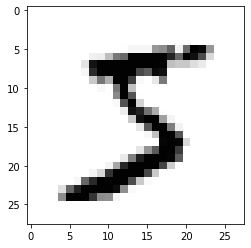

In [ ]:
# 첫 번째 이미지를 확인해 봅시다.
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [ ]:
# 이미지가 인식되는 원리를 알아봅시다.
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [ ]:
# 차원 변환 과정을 실습해 봅니다.
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

# 클래스 값을 확인해 봅니다.
print("class : %d " % (y_train[0]))

# 바이너리화 과정을 실습해 봅니다.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 2. 딥러닝 기본 프레임 만들기 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np
import os

# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 차원 변환 후, 테스트셋과 학습셋으로 나누어 줍니다.
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 모델 실행 환경을 설정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# 모델을 실행합니다.
history = model.fit(X_train, y_train, epochs=10, batch_size=200, verbose=1)

# 테스트 정확도를 출력합니다.
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))

Epoch 1/10
300/300 [==============================] - 4s 11ms/step - loss: 0.0298 - accuracy: 0.9928
Epoch 2/10
300/300 [==============================] - 3s 12ms/step - loss: 0.0140 - accuracy: 0.9961
Epoch 3/10
300/300 [==============================] - 5s 15ms/step - loss: 0.0088 - accuracy: 0.9977
Epoch 4/10
300/300 [==============================] - 4s 13ms/step - loss: 0.0048 - accuracy: 0.9991
Epoch 5/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 6/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0040 - accuracy: 0.9991
Epoch 7/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0045 - accuracy: 0.9986
Epoch 8/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 9/10
300/300 [==============================] - 3s 11ms/step - loss: 0.0024 - accuracy: 0.9996
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0892 - accurac

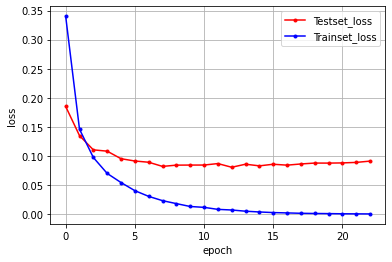

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다. 
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현해 봅니다.
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시해 보겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()